In [3]:
pip install scipy

In [4]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


#load csv
file_path = ('/content/houston-aqi-2010-2021.csv')
df = pd.read_csv (file_path)

print (df.head())

   Unnamed: 0  day_of_year  year   latitude  longitude  avg_pm10  aqi_pm10  \
0           0            2  2010  29.733726 -95.257593      13.0        12   
1           1            2  2010  29.733726 -95.257593      13.0        12   
2           2            2  2010  29.733726 -95.257593      13.0        12   
3           3            2  2010  29.733726 -95.257593      13.0        12   
4           4            2  2010  29.733726 -95.257593      13.0        12   

     avg_co  aqi_co    avg_no2  ...    avg_o3  aqi_o3  avg_pm25  aqi_pm25  \
0  0.297667     NaN  17.258333  ...  0.027294      32      11.6      48.0   
1  0.297667     NaN  17.258333  ...  0.027294      32      11.6      48.0   
2  0.297667     NaN  17.258333  ...  0.027294      32       9.7      40.0   
3  0.297667     NaN  17.258333  ...  0.027294      32       9.7      40.0   
4  0.325000     6.0  17.258333  ...  0.027294      32      11.6      48.0   

    avg_so2  aqi_so2  avg_humidity  avg_temperature  avg_wind  avg_p

Mean Pressure: 1017.8674999800002
Standard Deviation Pressure: 5.832771933864537
T-statistic: 30.479398498998172
P-value: 4.1207055234485156e-52


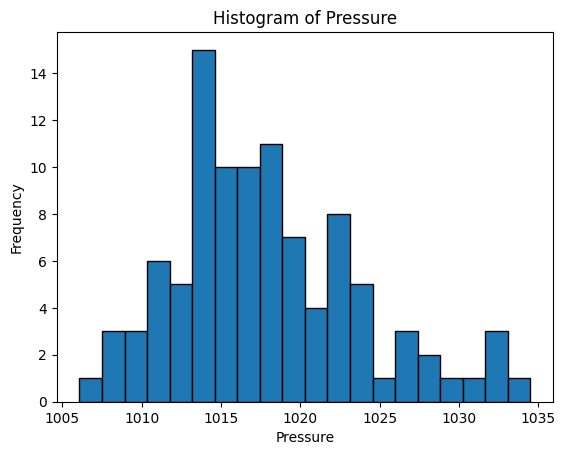

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = ('/content/houston-aqi-2010-2021.csv')
data = pd.read_csv(file_path)

# Randomly select 100 samples from the 'pressure' column
selected_samples = data['avg_pressure'].sample(100, random_state=42)

# Descriptive statistics
mean_pressure = np.mean(selected_samples)
std_dev_pressure = np.std(selected_samples)

# Let's test if the mean pressure is significantly different from a specific value, e.g., 1000
target_mean = 1000         # Hypothesis testing (Example: One-sample t-test)
t_statistic, p_value = stats.ttest_1samp(selected_samples, target_mean)

# Print results
print(f"Mean Pressure: {mean_pressure}")
print(f"Standard Deviation Pressure: {std_dev_pressure}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Visualize the data
plt.hist(selected_samples, bins=20, edgecolor='black')
plt.title('Histogram of Pressure')
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.show()


Mean Hypothesis Testing - T-statistic: 1734.6304624185123, P-value: 1.0110617789105973e-223
Proportion Hypothesis Testing - P-value: BinomTestResult(k=100, n=100, alternative='two-sided', statistic=1.0, pvalue=1.5777218104420236e-30)
Mean Confidence Interval (95%): (1016.7043209775483, 1019.0306789824521)
Proportion: 1.0


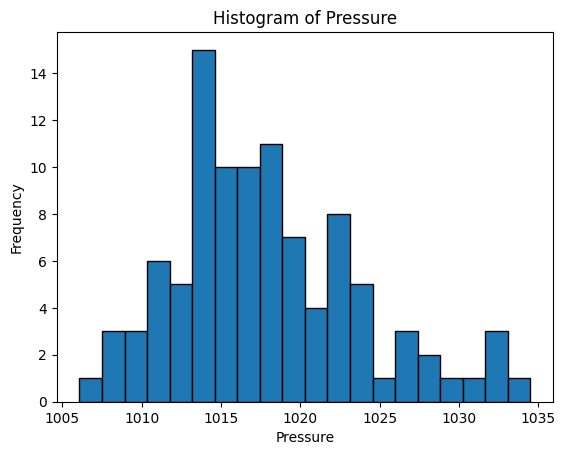

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
file_path = ('/content/houston-aqi-2010-2021.csv')
data = pd.read_csv(file_path)

# Randomly select 100 samples from the 'pressure' column
selected_samples = data['avg_pressure'].sample(100, random_state=42)

# Set your hypothesis values
claimed_mean = 1.0 # Your guess for the mean
claimed_proportion = 0.5  # Your guess for the proportion

# Hypothesis testing for the mean (Example: One-sample t-test)
t_statistic_mean, p_value_mean = stats.ttest_1samp(selected_samples, claimed_mean)

# Hypothesis testing for the proportion (Example: Proportion test)
# Assuming you want to test if the proportion is significantly different from 0.5
num_success = (selected_samples > claimed_mean).sum()
num_trials = len(selected_samples)
proportion = num_success / num_trials

p_value_proportion = stats.binomtest(num_success, n=num_trials, p=claimed_proportion)

# Print results
print(f"Mean Hypothesis Testing - T-statistic: {t_statistic_mean}, P-value: {p_value_mean}")
print(f"Proportion Hypothesis Testing - P-value: {p_value_proportion}")

# Confidence interval for the mean
confidence_interval_mean = stats.t.interval(0.95, len(selected_samples) - 1, loc=np.mean(selected_samples), scale=stats.sem(selected_samples))

# Interpretation
print(f"Mean Confidence Interval (95%): {confidence_interval_mean}")
print(f"Proportion: {proportion}")

# Visualize the data
plt.hist(selected_samples, bins=20, edgecolor='black')
plt.title('Histogram of Pressure')
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.show()
